# **Fare Prediction Model**


---

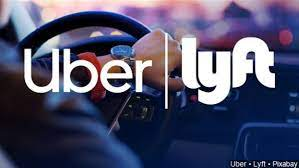

# **Objective**

---
The goal is to create fare price prection model for the ride hailing companies Uber and Lyft in the greater Boston area.


# **All about data**
---

Following Question were answered about Data:


1. How much data is present?
2. What attributes/features are continuous valued? 
3. Which attributes are categorical?



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import mean
from numpy import absolute
from numpy import sqrt

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from IPython.display import Image
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import ElasticNet
from sklearn import preprocessing,svm
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.pipeline import Pipeline


In [2]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AppliedML/rideshare_kaggle.csv/rideshare_kaggle.csv")
data.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [3]:
data.shape

(693071, 57)

**Answer**:
1. Data has 693071 rows and 57 columns

In [4]:
data.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

In [5]:
data.nunique(axis=0)

id                             693071
timestamp                       36179
hour                               24
day                                17
month                               2
datetime                        31350
timezone                            1
source                             12
destination                        12
cab_type                            2
product_id                         13
name                               13
price                             147
distance                          549
surge_multiplier                    7
latitude                           11
longitude                          12
temperature                       308
apparentTemperature               319
short_summary                       9
long_summary                       11
precipIntensity                    63
precipProbability                  29
humidity                           51
windSpeed                         291
windGust                          286
windGustTime

Statstical values for the every column as follows:

In [6]:
data.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,693071.000000,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,...,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000
mean,1544045709.755097,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,...,0.037374,1544043966.242997,33.457774,1544041609.570159,45.261313,1544047300.031310,29.731002,1544048034.740452,41.997343,1544047993.949826
std,689192.492586,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,...,0.055214,691202.767272,6.467224,690195.441408,5.645046,690135.337190,7.110494,687186.191494,6.936841,691077.651975
min,1543203646.000000,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1543161600.000000,15.630000,1543122000.000000,33.510000,1543154400.000000,11.810000,1543136400.000000,28.950000,1543186800.000000
25%,1543443968.000000,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,...,0.000000,1543420800.000000,30.170000,1543399200.000000,42.570000,1543438800.000000,27.760000,1543399200.000000,36.570000,1543438800.000000
50%,1543737478.000000,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1543770000.000000,34.240000,1543726800.000000,44.680000,1543788000.000000,30.130000,1543744800.000000,40.950000,1543788000.000000
75%,1544827509.000000,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,1544806800.000000,38.880000,1544788800.000000,46.910000,1544814000.000000,35.710000,1544788800.000000,44.120000,1544817600.000000
max,1545160511.000000,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,1545152400.000000,43.100000,1545192000.000000,57.870000,1545109200.000000,40.050000,1545134400.000000,57.200000,1545109200.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

Only Price column has some missing rows.



In [8]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1,keys=["total","percent"])
missing_data.head()

,total,percent
price,55095,0.079494
id,0,0.000000
ozone,0,0.000000
temperatureLowTime,0,0.000000
apparentTemperatureHigh,0,0.000000


8% data in price column is missing

Let's check how many categorical and numerical columns are present in the data.

In [9]:
len(data._get_numeric_data().columns)

46

**Answer**:
We have total 46 columns as numeric data columns. Remaining 11 are categorical columns.


In [10]:
categorical_cols=data.columns[data.dtypes =='object']
print(categorical_cols)


Index(['id', 'datetime', 'timezone', 'source', 'destination', 'cab_type',
       'product_id', 'name', 'short_summary', 'long_summary', 'icon'],
      dtype='object')


# Data Cleaning and Transformation

We are removing the columns are as follows:
1. Id: Used only for unique records.
2. Datetime, Timestamp: As we already have month, day, hour.
3. Timezone: Only one timezone so we can remove it.
4. Product_id:Removing product_id as we are considering product name.
5. Every colum related to weather. Currently not dealing with the weather aspect and hence removing all the related columns.
6. longitude and latitude: as we have the destination name

In [11]:
data = data.drop(['id', 'datetime', 'timezone', 'timestamp','latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',"product_id",
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperatureMax', 'apparentTemperatureMaxTime'], axis=1)


Imputing the mean value in place of missing values.

In [12]:
for j in ["price"]:
    data.loc[data.loc[:,j].isnull(),j] = data.loc[:,j].mean()
data.price.isnull().sum()

0

# Exploratory Data Analysis

Let's do some data Exploration via Graph.


We will plot the pairplots for all the columns in the data. Since the pairplot takes forever to run on the entire dataset. we will only take 2000 samples to plot it. Pairplot includes all the scatter plots and histogram of the columns.

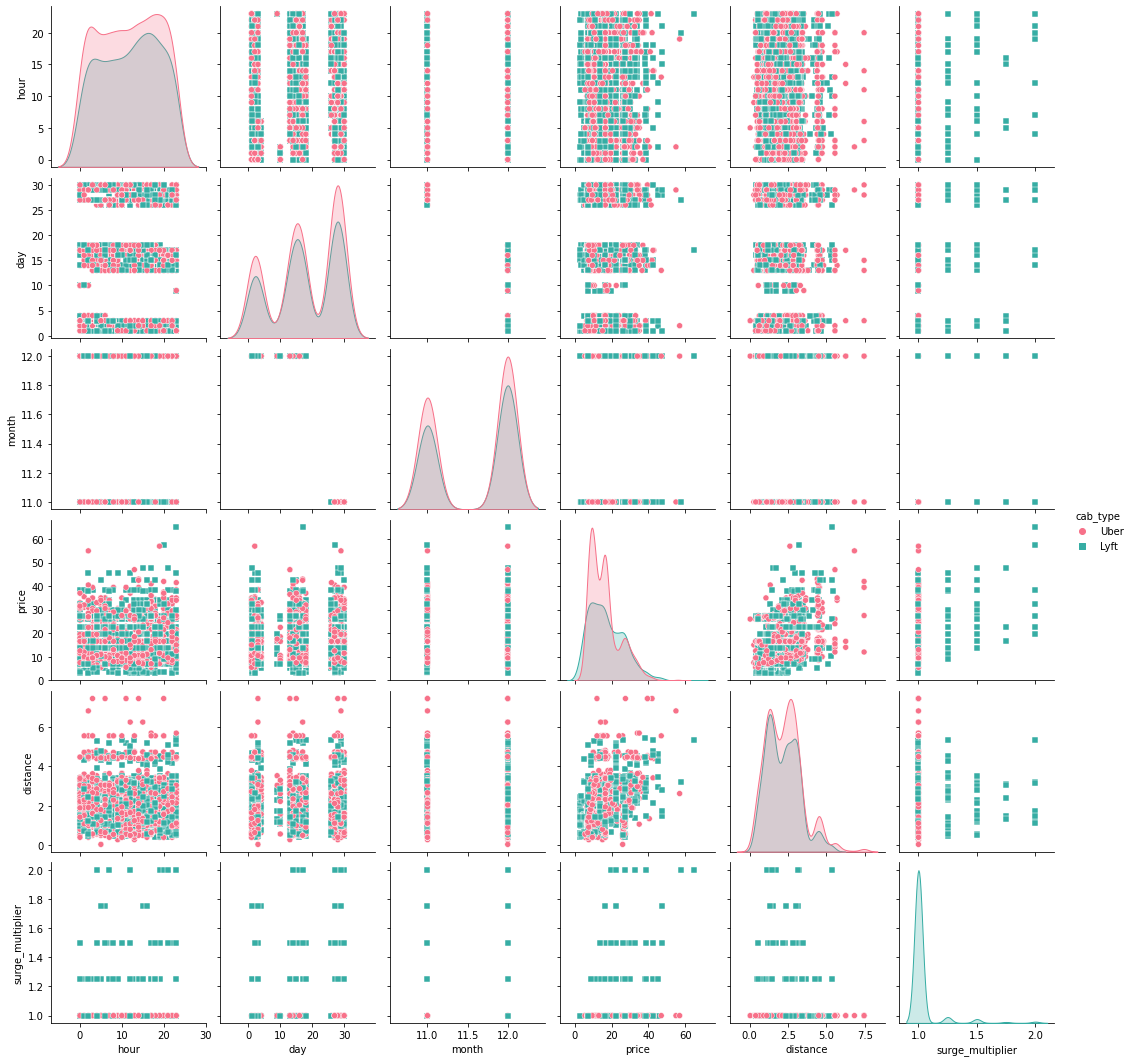

In [13]:
sns_pairplot=sns.pairplot(data.sample(2000), hue="cab_type", markers=["o","s"],diag_kind="kde",kind="scatter",palette="husl")

Diagonal graphs represent the histogram for every column in the modified dataset.

**Observation**: 

**Histograms:**
Histogram of price, distance and surge_nultiplier column data seems skewed. 
We need to apply some transformation to make it normally distributed. 

**Scatter Plot**:
By looking at the scatter plots, we can see distance vs price and price vs surge_multiplier seems corealted. We will plot correlation matrix further to extract the exact relationships between attribute and labels.

Let's plot the boxplots for checking whether there are outliers in the data or not

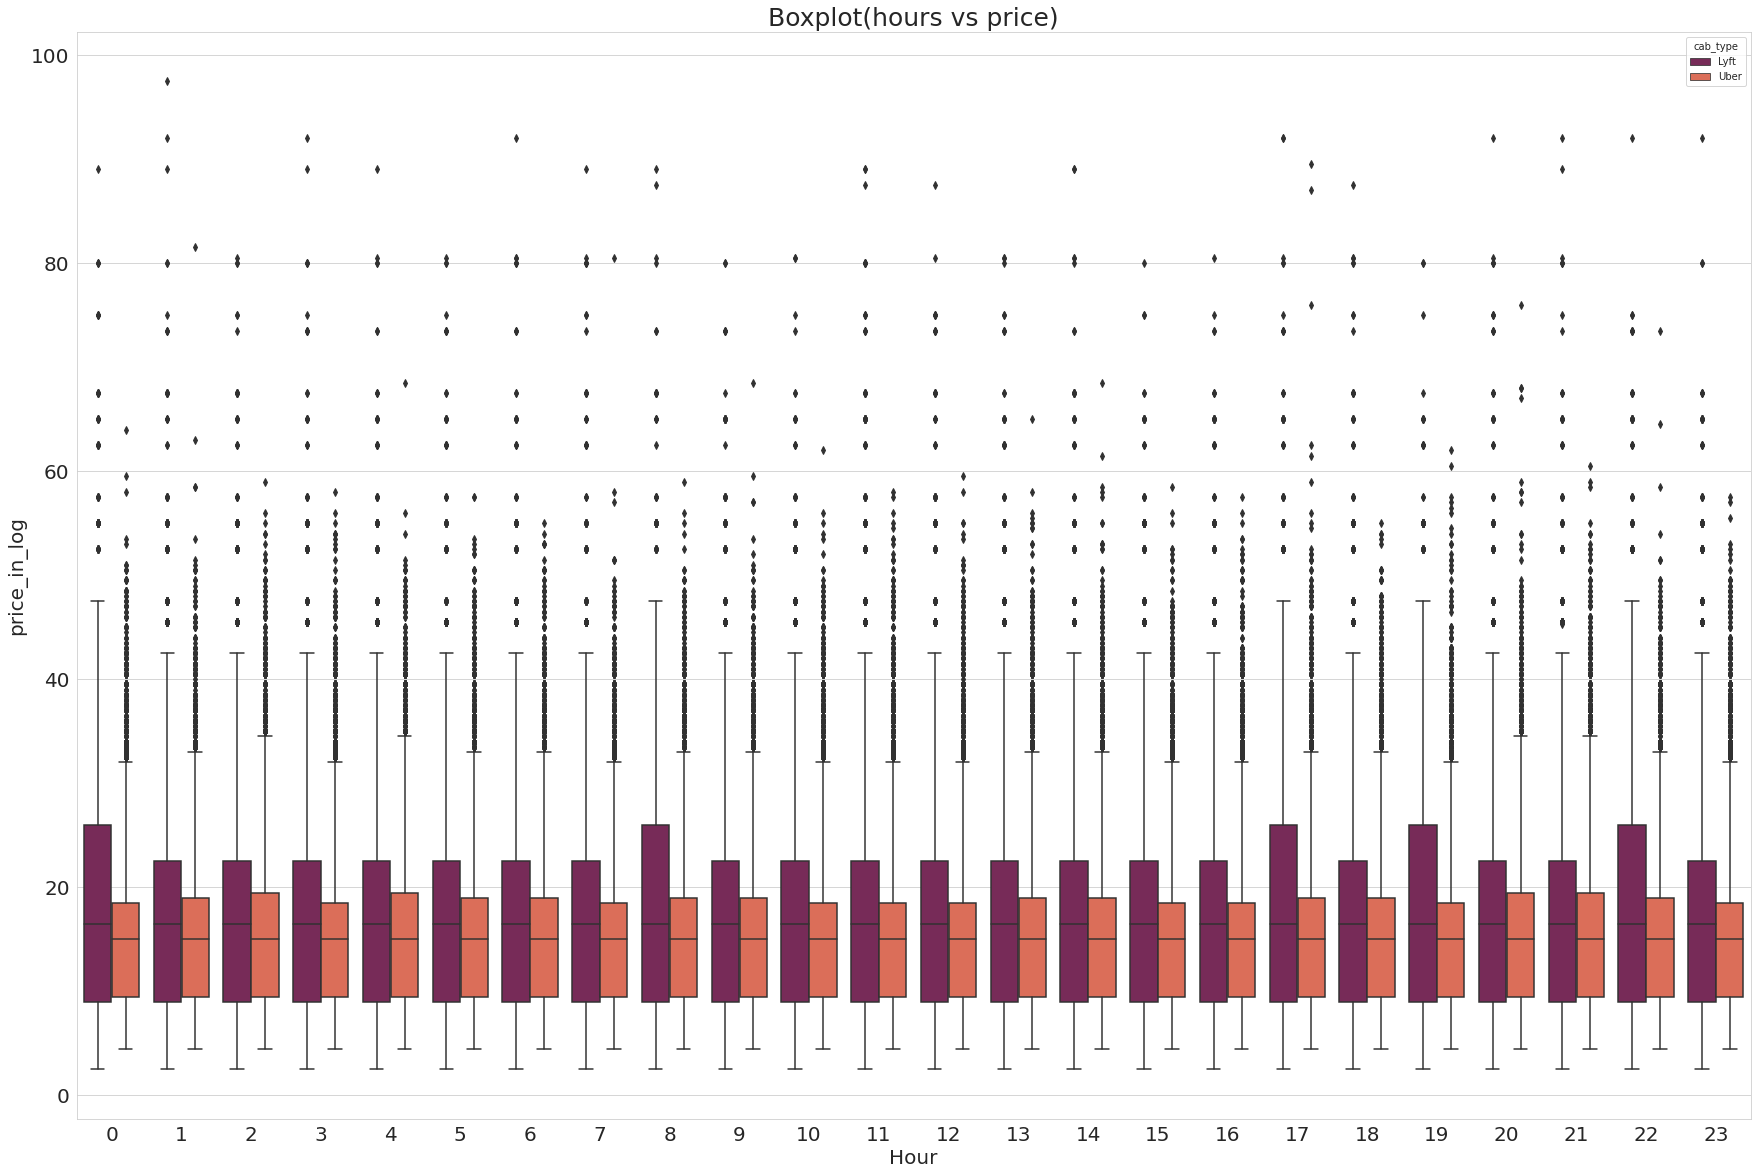

In [14]:
plt.figure(figsize=(30,20))
sns.set_style("whitegrid")
sns.boxplot(x="hour", y="price",data=data, hue="cab_type",palette="rocket")
plt.xticks(fontsize= 20)
plt.yticks(fontsize= 20)
plt.xlabel("Hour",fontsize=20)
plt.ylabel("price_in_log",fontsize=20)
plt.title("Boxplot(hours vs price)",fontsize=25)
plt.show()


**Observation**: 


1.   Price range of lyft is every time higher than uber
2.   There are many outliers present in the data. especially in uber.



Let's work on removing the outliers:

In [15]:
quantiles = stats.mstats.mquantiles(data["price"] , prob=[0.25,0.75])
IQR= stats.iqr(data["price"])
upper = quantiles[1]+(1.5*IQR)
lower = quantiles[0]-(1.5*IQR)
data.loc[data["price"]>upper,"price"]= np.nan
data.loc[data["price"]<lower,"price"]= np.nan
data.price.isnull().sum()


7982

We can see the 7982 outliers are present in the dataset. We can remove them by imputing mean values.

In [16]:
for i in ["price"]:
    data.loc[data.loc[:,i].isnull(),i] = data.loc[:,i].mean()
data.price.isnull().sum()


0

Plotting the PCC for observing the relationaship between columns.

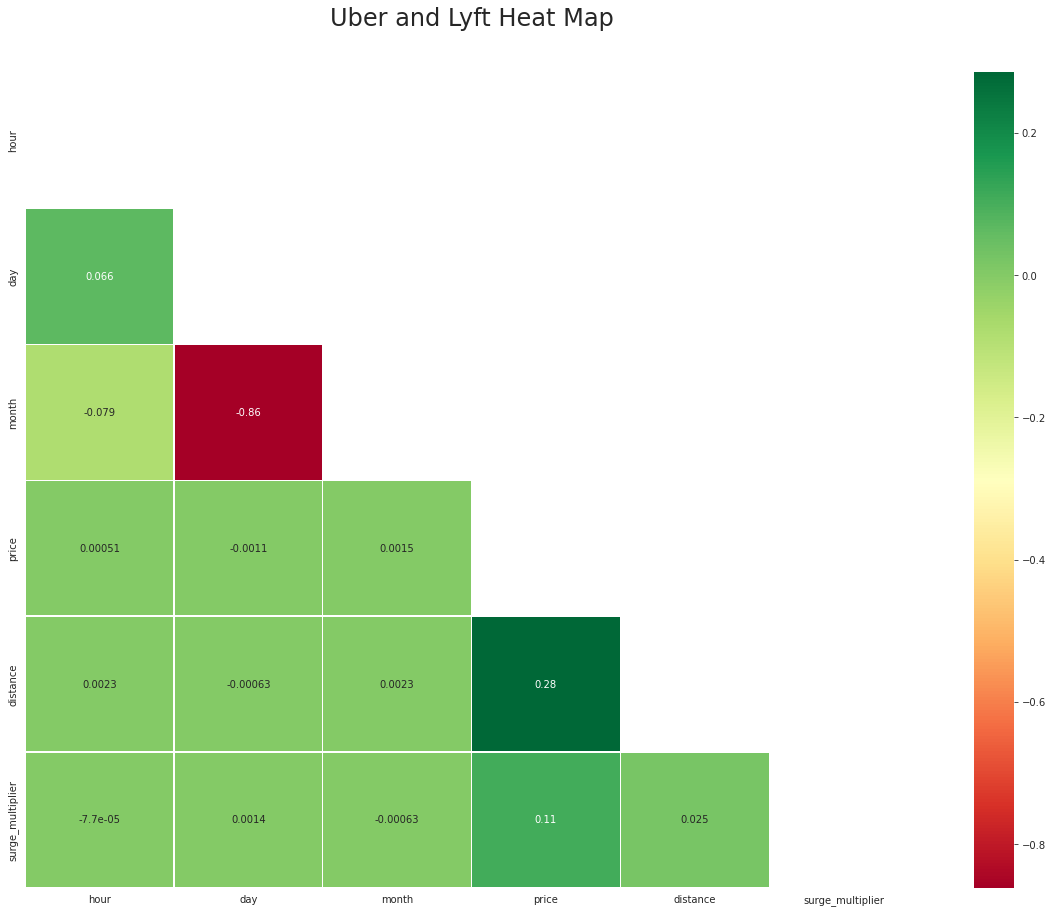

In [17]:
corrmat = data.corr()

fig, ax = plt.subplots(figsize=(20,15))
title = "Uber and Lyft Heat Map"
plt.title(title,fontsize=24)
ttl = ax.title
ttl.set_position([0.5,1.05])
mask = np.triu(np.ones_like(corrmat, dtype=bool))
sns.heatmap(corrmat,mask=mask,annot=True,cmap='RdYlGn',linewidths=0.20,ax=ax)





*   Price and surge multiplier highly correlated
*   Price and distance is correlated
*   Distance and surge-multiplier is not correlated






# Data Preparation

Extracting categorical columns and numerical columns from the updated dataset:

In [18]:
categorical_cols=data.columns[data.dtypes =='object']
print(categorical_cols)
len(categorical_cols)

Index(['source', 'destination', 'cab_type', 'name'], dtype='object')


4

Let's count the unique values in categorical columns

In [19]:
for i in categorical_cols:
  print(data[i].value_counts())

Financial District         58857
Theatre District           57813
Back Bay                   57792
Boston University          57764
North End                  57763
Fenway                     57757
Northeastern University    57756
South Station              57750
Haymarket Square           57736
West End                   57562
Beacon Hill                57403
North Station              57118
Name: source, dtype: int64
Financial District         58851
Theatre District           57798
Back Bay                   57780
Haymarket Square           57764
Boston University          57764
Fenway                     57757
North End                  57756
Northeastern University    57755
South Station              57749
West End                   57575
Beacon Hill                57403
North Station              57119
Name: destination, dtype: int64
Uber    385663
Lyft    307408
Name: cab_type, dtype: int64
UberXL          55096
WAV             55096
Black SUV       55096
Black           55095
Ta

In [20]:
numeric_cols=data._get_numeric_data().columns
print(numeric_cols)


Index(['hour', 'day', 'month', 'price', 'distance', 'surge_multiplier'], dtype='object')


We need to convert categorical columns into numerical columns by one hot encoding and we will perform statndrad scaling on numeric data.


In [21]:
ohe=OneHotEncoder()
data_encode_col = pd.DataFrame(ohe.fit_transform(data[categorical_cols]).toarray(),columns=["encoded_" + x for x in ohe.get_feature_names(categorical_cols)])
data_encode_col.head()
data_other_cols = data.drop(columns=categorical_cols)
data = pd.concat([data_encode_col, data_other_cols], axis=1)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [22]:
data.head()

,encoded_source_Back Bay,encoded_source_Beacon Hill,encoded_source_Boston University,encoded_source_Fenway,encoded_source_Financial District,encoded_source_Haymarket Square,encoded_source_North End,encoded_source_North Station,encoded_source_Northeastern University,encoded_source_South Station,...,encoded_name_UberPool,encoded_name_UberX,encoded_name_UberXL,encoded_name_WAV,hour,day,month,price,distance,surge_multiplier
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,9,16,12,5.0,0.44,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2,27,11,11.0,0.44,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,28,11,7.0,0.44,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4,30,11,26.0,0.44,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3,29,11,9.0,0.44,1.0


In [23]:
scaler= StandardScaler()
data = pd.DataFrame(scaler.fit_transform(data),columns=data.columns)


In [24]:
data.head()

,encoded_source_Back Bay,encoded_source_Beacon Hill,encoded_source_Boston University,encoded_source_Fenway,encoded_source_Financial District,encoded_source_Haymarket Square,encoded_source_North End,encoded_source_North Station,encoded_source_Northeastern University,encoded_source_South Station,...,encoded_name_UberPool,encoded_name_UberX,encoded_name_UberXL,encoded_name_WAV,hour,day,month,price,distance,surge_multiplier
0,-0.301614,-0.300505,-0.301534,-0.301514,-0.304636,3.317249,-0.301532,-0.299691,-0.301512,-0.301494,...,-0.293858,-0.293866,-0.293872,-0.293872,-0.376957,-0.179755,0.839341,-1.357559,-1.536021,-0.151349
1,-0.301614,-0.300505,-0.301534,-0.301514,-0.304636,3.317249,-0.301532,-0.299691,-0.301512,-0.301494,...,-0.293858,-0.293866,-0.293872,-0.293872,-1.384425,0.922198,-1.191411,-0.628845,-1.536021,-0.151349
2,-0.301614,-0.300505,-0.301534,-0.301514,-0.304636,3.317249,-0.301532,-0.299691,-0.301512,-0.301494,...,-0.293858,-0.293866,-0.293872,-0.293872,-1.528349,1.022375,-1.191411,-1.114654,-1.536021,-0.151349
3,-0.301614,-0.300505,-0.301534,-0.301514,-0.304636,3.317249,-0.301532,-0.299691,-0.301512,-0.301494,...,-0.293858,-0.293866,-0.293872,-0.293872,-1.096577,1.222730,-1.191411,1.192938,-1.536021,-0.151349
4,-0.301614,-0.300505,-0.301534,-0.301514,-0.304636,3.317249,-0.301532,-0.299691,-0.301512,-0.301494,...,-0.293858,-0.293866,-0.293872,-0.293872,-1.240501,1.122553,-1.191411,-0.871750,-1.536021,-0.151349


In [25]:
data.shape

(693071, 45)

# Model Training

In [26]:
data.dropna(inplace = True)
X=data.drop(['price'],axis=1)
y=data['price']

instances = X.shape[0]
features = X.shape[1]

# Converting each dataframe into a numpy array since each dataframe contains only one column
X = np.array(X).reshape(-1, features)
y = np.array(y).reshape(-1, 1)

identity_vector = np.asarray([[1 for num in range(instances)]])
identity_vector = identity_vector.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=40)
# print(X_train, X_test, y_train)
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)
print("Training set mean:", X_train.mean(), y_train.mean())
print("Testing set mean:", X_test.mean(), y_test.mean())
print("Training set standard deviation:", X_train.std(), y_train.std())
print("Testing set standard deviation:", X_test.std(), y_test.std())

Training set shape: (554456, 44) (554456, 1)
Testing set shape: (138615, 44) (138615, 1)
Training set mean: -2.124310478650521e-05 -0.00032480055681517354
Testing set mean: 8.497180613571272e-05 0.0012991928545252468
Training set standard deviation: 0.9999617016235108 0.9990762967096172
Testing set standard deviation: 1.0001531732236146 1.0036852346455714


Helper function required for model training and evalution:


In [44]:
def evaluate_model(test,pred):
    #print(test,pred)
    print("R^2:", r2_score(test, pred))
    print("MAE:", mean_absolute_error(test,pred))
    print("RMSE:",np.sqrt(mean_squared_error(test, pred)))
    print("")
    
def create_mini_batches(X, y, batch_size):
    mini_batches = []
    data = np.hstack((X, y))
    np.random.shuffle(data)
    n_minibatches = data.shape[0] // batch_size
    i = 0
 
    for i in range(n_minibatches + 1):
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    if data.shape[0] % batch_size != 0:
        mini_batch = data[i * batch_size:data.shape[0]]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    return mini_batches

def perform_lr(X_train,X_test,train_y, test_y):
    #X_train = np.append(X_train,identity_vector[:X_train.shape[0],:],1)
    #X_test = np.append(X_test,identity_vector[:X_test.shape[0],:],1)
    lr = LinearRegression()
    lr.fit(X_train,train_y)
    y_val_pred = lr.predict(X_test)
    y_train_pred = lr.predict(X_train)

    print('Shape:',X_train.shape)
    print('Rank:',np.linalg.matrix_rank(X_train))
    print('coeff:',lr.coef_)
    #Test linear regression model 
    print("Training Loss")
    evaluate_model(train_y,y_train_pred)
    print("Validation Loss")
    evaluate_model(test_y,y_val_pred)

    
def perform_sgd(X_train,train_y, X_test, test_y,alpha=0.0001, epsilon=0.1, eta0=0.01,penalty=None,learning_rate='invscaling',batchsize=1):
    print("penalty term:",penalty,",learning rate:",learning_rate,",batch size:",batchsize)
#     print(train_y)
    X_train = np.append(X_train,identity_vector[:X_train.shape[0],:],1)
    X_test = np.append(X_test,identity_vector[:X_test.shape[0],:],1)
#     print(X_train.shape)
#     print('Rank:',np.linalg.matrix_rank(X_train))
    model = SGDRegressor(alpha=alpha, epsilon=epsilon, eta0=eta0,penalty=penalty, learning_rate=learning_rate)
    if batchsize > 1:
        batcherator = create_mini_batches(X_train, train_y,batch_size=batchsize)
        for X_chunk, y_chunk in batcherator:
            y_chunk = y_chunk.squeeze(1)
            model.partial_fit(X_chunk, y_chunk)
    else:
        train_y = train_y.squeeze(1)
        model.fit(X_train, train_y)
        
    y_val_predicted = model.predict(X_test)
    print("validation loss")
    evaluate_model(test_y,y_val_predicted)

    y_train_predicted = model.predict(X_train)
    print("training loss")
    evaluate_model(train_y,y_train_predicted)



def perform_pr(X_train,X_test,train_y,test_y):
    p = preprocessing.PolynomialFeatures(degree=2)
    X_train_poly = p.fit_transform(X_train)
    X_test_poly = p.fit_transform(X_test)
    X_train_poly = np.append(X_train,identity_vector[:X_train.shape[0],:],1)
    X_test_poly = np.append(X_test,identity_vector[:X_test.shape[0],:],1)
    pr = LinearRegression()
    pr.fit(X_train_poly,train_y)
    y_val_pred = pr.predict(X_test_poly)
    #Test plynomial regression model 
    print("validation loss") 
    evaluate_model(test_y,y_val_pred)


    
def add_poly(X_train,X_test):
    p = preprocessing.PolynomialFeatures(degree=2)
    X_train_poly = p.fit_transform(X_train[:,:7])
    X_test_poly = p.fit_transform(X_test[:,:7])
    X_train_poly = StandardScaler().fit_transform(X_train_poly)
    X_test_poly = StandardScaler().fit_transform(X_test_poly)
#     print(X_train_poly.shape,X_train[:,8:].shape)
    X_train_poly = np.append(X_train_poly,X_train[:,8:],1)
    X_test_poly = np.append(X_test_poly,X_test[:,8:],1)
    return X_train_poly,X_test_poly
    
def perform_ridge(X_train,train_y,X_test,test_y,alpha=0.5):
    rdg = Ridge(alpha = alpha)
    print("alpha:",alpha)
    rdg.fit(X_train, train_y)
    pred_test_rr= rdg.predict(X_test)
    print("Validation loss")
    evaluate_model(test_y,pred_test_rr)
    y_train_predicted = rdg.predict(X_train)
    print("training loss")
    evaluate_model(train_y,y_train_predicted)

    
def perform_l(X_train,y_train,X_test,test_y,alpha=0.1):
    model_lasso = Lasso(alpha=alpha)
    model_lasso.fit(X_train, y_train) 
    pred_train_lasso= model_lasso.predict(X_test)
    print("alpha:",alpha)
    print("validation loss")
    evaluate_model(test_y,pred_train_lasso)
    y_train_predicted = model_lasso.predict(X_train)
    print("training loss")
    evaluate_model(y_train,y_train_predicted)


    
def perform_en(X_train, y_train,X_test,test_y,alpha=0.1,l1=0.5):
    model = ElasticNet(alpha=alpha,l1_ratio=l1)
    model.fit(X_train, y_train) 
    pred_test = model.predict(X_test)
    print("alpha:",alpha,",l1 ratio:",l1)
    print("validation loss")
    evaluate_model(test_y,pred_test)
    pred_train = model.predict(X_train)

    print("alpha:",alpha,",l1 ratio:",l1)
    print("training loss")
    evaluate_model(y_train,pred_train)



    
def k_fold_closed(X_train,y_train):
    model = Ridge(alpha=0.000000000000000000000000000000001)
#     model = LinearRegression()
    pipeline = Pipeline([('transformer', StandardScaler()), ('estimator', model)])
#     pipeline = Pipeline([('transformer', StandardScaler()), ('model', TransformedTargetRegressor(regressor=model,transformer=StandardScaler()))])

    
    cv = KFold(n_splits=4, random_state=20, shuffle=True)
    
    print('Rank:',np.linalg.matrix_rank(X_train))
#     X_train = np.append(X_train,identity_vector[:X_train.shape[0],:],1)
    print('Rank:',np.linalg.matrix_rank(X_train))
    print('Shape:',X_train.shape)
#     X_train = StandardScaler().fit_transform(X_train)
    scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error',
                             cv=cv, n_jobs=-1)
    print(X_train)
    print(scores)
    #view RMSE
    return sqrt(mean(absolute(scores)))
    
def k_fold_sgd(X_train,train_y):
    cv = KFold(n_splits=4, random_state=1, shuffle=True)
    model = SGDRegressor()
    sgd_x = StandardScaler().fit_transform(X_train)
    sgd_y = train_y.squeeze(1)
    sgd_x = np.append(sgd_x,identity_vector[:sgd_x.shape[0],:],1)
    scores = cross_val_score(model, sgd_x, sgd_y, scoring='neg_mean_absolute_error',
                             cv=cv, n_jobs=-1)
    print(scores)
    #view RMSE
    return sqrt(mean(absolute(scores)))
    

In [28]:
#Train model using linear regression(closed form)
perform_lr(X_train,X_test,y_train, y_test)

Shape: (554456, 44)
Rank: 38
coeff: [[-5.84037534e+11 -5.82246808e+11 -2.97862401e+11 -2.97845993e+11
  -5.88900089e+11 -2.97796763e+11 -2.97860057e+11 -5.80929797e+11
  -2.97843649e+11 -2.97829585e+11 -5.84133981e+11 -5.82979706e+11
  -3.69737656e+11 -3.68638791e+11 -8.36446139e+10 -8.36400063e+10
  -3.72833951e+11 -8.36446139e+10 -8.36393481e+10 -3.67807880e+11
  -8.36386898e+10 -8.36347402e+10 -3.69790004e+11 -3.69140713e+11
   6.46350864e+12 -2.00395627e+12  1.81939588e+12  1.81941096e+12
  -2.69970683e+12 -2.69970683e+12 -2.69970683e+12 -2.69970683e+12
  -2.69970683e+12 -2.69965834e+12  1.81939588e+12  1.81933553e+12
   1.81938079e+12  1.81941096e+12  1.81941096e+12  5.38825989e-05
  -2.54249573e-03 -5.00798225e-04  2.90130615e-01  5.83801270e-02]]
Training Loss
R^2: 0.8617481653387474
MAE: 0.2333115486651984
RMSE: 0.3714788624839923

Validation Loss
R^2: 0.8618734465803293
MAE: 0.23472431802629343
RMSE: 0.3730234400548633



**Observation** (Linear regression closed form): There is not much difference between training and validation loss. This indicates that model is performing reasonably well. It's not underfitting or overfitting with dataset.

In [29]:
perform_sgd(X_train,y_train, X_test, y_test,penalty='elasticnet',learning_rate='constant',batchsize=5)
perform_sgd(X_train,y_train, X_test, y_test,penalty='l1',learning_rate='optimal',batchsize=10)
perform_sgd(X_train,y_train, X_test, y_test,penalty='l2',learning_rate='adaptive',batchsize=100)
perform_sgd(X_train,y_train, X_test, y_test,penalty='l2',learning_rate='invscaling',batchsize=50)
perform_sgd(X_train,y_train, X_test, y_test)

penalty term: elasticnet ,learning rate: constant ,batch size: 5
validation loss
R^2: 0.8199889146193468
MAE: 0.2759818072087603
RMSE: 0.4258406935461399

training loss
R^2: 0.8183073738057717
MAE: 0.27507562255446455
RMSE: 0.42586044787713556

penalty term: l1 ,learning rate: optimal ,batch size: 10
validation loss
R^2: 0.4183782745647113
MAE: 0.5263559576165668
RMSE: 0.7654517943540259

training loss
R^2: 0.4190991067482809
MAE: 0.5232827163966731
RMSE: 0.7614645288912191

penalty term: l2 ,learning rate: adaptive ,batch size: 100
validation loss
R^2: 0.8198470143059364
MAE: 0.28721062021630966
RMSE: 0.4260085027230229

training loss
R^2: 0.8193462119610894
MAE: 0.2861219815800056
RMSE: 0.42464126175028705

penalty term: l2 ,learning rate: invscaling ,batch size: 50
validation loss
R^2: 0.8611218322925468
MAE: 0.23665682134870697
RMSE: 0.374036964852156

training loss
R^2: 0.8609277776186577
MAE: 0.23536909245435642
RMSE: 0.37257941180746323

penalty term: None ,learning rate: invsca

**Observation** (Linear regression SGD):
Stocastic Gredient descent (SGD) method is observed with different learning rate and batch sizes:

1. Constant learning Rate and elasticnet penalty with batch size 5: Constant learning rate is giving almost 0.43 rmse which is more than closed form solution. We can definitely improve it with optimum hyperparameter tuning.


2. Optimal learning rate and l1 penalty with batch size 10: Looking at the evaluation metrics seems like model is slightly overfitting than other combinations of hyperparameter.Optimal learning rate is not suitable for the dataset with small batch size. A high learning rate can cause the model to converge too quickly and overshoot the optimal parameters, leading to overfitting. Penalty l1 is not really helping here to prevent the overfitting


3. penalty term l2 ,learning rate adaptive ,batch size 100: The RMSE value of 0.45 suggests that, on average, the model's predictions are off by around 0.45 units of the target variable. The R-squared value of 0.79 indicates that the model fits the data poorly and is not able to explain much of the variance in the target variable. 

4. penalty term l2 ,learning rate invscaling ,batch size 50 : invscaling learning rate is actually suitable for this dataset because it helps to prevent overshooting the optimal parameters in the early stage of training. Batch size 50 is not small but optimal for this dataset. l2 regression is helping more to prevent the overfitting of the dataset. Although, Reducing batch size will reduce rmse more and gives the better result.


5. penalty term None ,learning rate invscaling ,batch size 1 : With invscaling learning rate and smaller batch size these parameters gives best results. 


linear regression closed form solution is performing almost similar like SGD linear regression.


In [45]:
#Train model using polynomial regression(Closed form)

perform_pr(X_train,X_test, y_train,y_test)

validation loss
R^2: 0.8618734465803293
MAE: 0.23472431802629343
RMSE: 0.3730234400548633



**Observation** (Polynomial Regression closed form):
Polynomial regression performing similar results as linear regression which indicates that there is not non-linear relationship in the data between labels and attributes.

In [31]:
#Train model using polynomial regression(SGD)

#Add polynomial features
X_train_poly,X_test_poly = add_poly(X_train,X_test)

perform_sgd(X_train_poly,y_train, X_test_poly, y_test,penalty='elasticnet',learning_rate='constant',batchsize=5)
perform_sgd(X_train_poly,y_train, X_test_poly, y_test,penalty='l1',learning_rate='optimal',batchsize=10)
perform_sgd(X_train_poly,y_train, X_test_poly, y_test,penalty='l2',learning_rate='adaptive',batchsize=100)
perform_sgd(X_train_poly,y_train, X_test_poly, y_test)


penalty term: elasticnet ,learning rate: constant ,batch size: 5
validation loss
R^2: 0.7529718235629365
MAE: 0.34426288279339246
RMSE: 0.49885092452950097

training loss
R^2: 0.7519775572378036
MAE: 0.3434505955878878
RMSE: 0.4975584951429283

penalty term: l1 ,learning rate: optimal ,batch size: 10
validation loss
R^2: 0.44149617440093747
MAE: 0.5974101519594691
RMSE: 0.7500852257641194

training loss
R^2: 0.4383499725019444
MAE: 0.5960415040247149
RMSE: 0.7487408835882867

penalty term: l2 ,learning rate: adaptive ,batch size: 100
validation loss
R^2: 0.7166243163569255
MAE: 0.37059222362141403
RMSE: 0.534292189657923

training loss
R^2: 0.7155542041258195
MAE: 0.36870046826596714
RMSE: 0.5328419573720365

penalty term: None ,learning rate: invscaling ,batch size: 1
validation loss
R^2: 0.8600985739952701
MAE: 0.2348067862756657
RMSE: 0.3754123934605395

training loss
R^2: 0.8599459532809735
MAE: 0.23347162197104157
RMSE: 0.37389226984447904



**Observation** (polynomial regression SGD):
Polynomial regression is performing similar way as linear regression. Seems like there no non-linear relationship between labels and attributes. 

In case of polynomial regression, only invscaling learning rate and smallest batch size produces best results. Any other batch size more than 1 and learning rate like constant , optimal and adaptive is making the model overfitting to this dataset

In [32]:
#Implement k fold with closed form using linear regression model
k_fold_closed(X_train, y_train)

Rank: 38
Rank: 38
Shape: (554456, 44)
[[-0.30161408 -0.30050529 -0.30153436 ...  0.83934123 -0.46484585
  -0.15134887]
 [ 3.31549508 -0.30050529 -0.30153436 ...  0.83934123 -0.42094524
  -0.15134887]
 [-0.30161408 -0.30050529 -0.30153436 ...  0.83934123 -0.95653276
  -0.15134887]
 ...
 [-0.30161408 -0.30050529 -0.30153436 ... -1.19141056 -0.90385202
  -0.15134887]
 [-0.30161408 -0.30050529 -0.30153436 ... -1.19141056 -0.39460487
  -0.15134887]
 [-0.30161408 -0.30050529 -0.30153436 ...  0.83934123 -0.01705956
  -0.15134887]]
[-0.23321071 -0.23446888 -0.23373629 -0.23450121]


0.48371404086211867

In [33]:
#Implement k fold with sgd using linear regression model
k_fold_sgd(X_train,y_train)

[-0.23707516 -0.23135749 -0.23447338 -0.23431048]


0.4840497184252309

**Observation** (K-fold linear regression):
K-fold cross-validation with SGD is a more robust approach to evaluating the performance of a linear regression model than *a* standard linear regression model, but it can also increase the variance of the estimated performance, leading to a higher RMSE. In our case there is a large variation in the performance of the model across the folds. And hence k-fold rmse is higher than standard linear regression model rmse.


In [34]:
#Implement k fold with sgd using polynomial regression model

k_fold_closed(X_train_poly, y_train)

Rank: 39
Rank: 39
Shape: (554456, 72)
[[ 0.         -0.30203546 -0.3007894  ...  0.83934123 -0.46484585
  -0.15134887]
 [ 0.          3.31086954 -0.3007894  ...  0.83934123 -0.42094524
  -0.15134887]
 [ 0.         -0.30203546 -0.3007894  ...  0.83934123 -0.95653276
  -0.15134887]
 ...
 [ 0.         -0.30203546 -0.3007894  ... -1.19141056 -0.90385202
  -0.15134887]
 [ 0.         -0.30203546 -0.3007894  ... -1.19141056 -0.39460487
  -0.15134887]
 [ 0.         -0.30203546 -0.3007894  ...  0.83934123 -0.01705956
  -0.15134887]]
[-0.23383324 -0.23498186 -0.23500779 -0.23519671]


0.4845151177275482

In [35]:
#Implement k fold with sgd using polynomial regression model

k_fold_sgd(X_train_poly,y_train)

[-0.23573872 -0.23503918 -0.23824596 -0.23602374]


0.48606779140332806

**Observation** (K-fold polynomial regression):

K-fold linear regression is similar to k-fold polynomial regression. Both performing more or less same results with or without sgd.



# Regularization Of Linear Model

In [36]:
perform_ridge(X_train,y_train,X_test,y_test,alpha=0.000000001)
perform_ridge(X_train,y_train,X_test,y_test,alpha=0.5)
perform_ridge(X_train,y_train,X_test,y_test,alpha=5)
perform_ridge(X_train,y_train,X_test,y_test,alpha=1000)

alpha: 1e-09


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=8.11893e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Validation loss
R^2: 0.8619328466937523
MAE: 0.23507085486191912
RMSE: 0.3729432236996928

training loss
R^2: 0.8618280642814838
MAE: 0.23366171220256404
RMSE: 0.37137150384396084

alpha: 0.5
Validation loss
R^2: 0.8619328428283652
MAE: 0.23507090477262857
RMSE: 0.3729432289202318

training loss
R^2: 0.8618280642808281
MAE: 0.23366176018319768
RMSE: 0.371371503844842

alpha: 5
Validation loss
R^2: 0.8619328079813877
MAE: 0.23507135396945758
RMSE: 0.37294327598408006

training loss
R^2: 0.8618280642159064
MAE: 0.23366219211031075
RMSE: 0.3713715039320888

alpha: 1000
Validation loss
R^2: 0.8619225286208837
MAE: 0.23517457238531597
RMSE: 0.37295715888766123

training loss
R^2: 0.8618254523243127
MAE: 0.2337614301973292
RMSE: 0.3713750139702158



**Observation (ridge)**:
Ridge regression in not improving the performance significantly. But seems like it resulting a model with minimum rmse than any other combination

In [37]:
#Perform Regularization(Lasso)
  
perform_l(X_train, y_train,X_test,y_test,alpha=0.0000000001)
perform_l(X_train, y_train,X_test,y_test,alpha=0.1)
perform_l(X_train, y_train,X_test,y_test,alpha=5)
perform_l(X_train, y_train,X_test,y_test,alpha=100)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.622e+03, tolerance: 5.534e+01
  model = cd_fast.enet_coordinate_descent(


alpha: 1e-10
validation loss
R^2: 0.861932846693331
MAE: 0.23507085485754492
RMSE: 0.3729432237002618

training loss
R^2: 0.8618280642814841
MAE: 0.23366171219721604
RMSE: 0.3713715038439606

alpha: 0.1
validation loss
R^2: 0.7579664691277564
MAE: 0.38277903411940556
RMSE: 0.49378205579517426

training loss
R^2: 0.7580312395475854
MAE: 0.38110373036219736
RMSE: 0.49144882971320697

alpha: 5
validation loss
R^2: -2.6180229866223925e-06
MAE: 0.8008473084119796
RMSE: 1.0036865484802193

training loss
R^2: 0.0
MAE: 0.7973463512345691
RMSE: 0.9990762967096172

alpha: 100
validation loss
R^2: -2.6180229866223925e-06
MAE: 0.8008473084119796
RMSE: 1.0036865484802193

training loss
R^2: 0.0
MAE: 0.7973463512345691
RMSE: 0.9990762967096172



**Observation (Lasso):**
Lasso regression is not really improving the performance, It is actually decreasing with increasing value of alpha. for smaller value of alpha the results are more or less similar


In [38]:
#Perform Regularization(Elastic net)
    
perform_en(X_train, y_train,X_test,y_test,alpha=0.0000000001,l1=0.5)
perform_en(X_train, y_train,X_test,y_test,alpha=0.1,l1=0.8)
perform_en(X_train, y_train,X_test,y_test,alpha=5,l1=0.5)
perform_en(X_train, y_train,X_test,y_test,alpha=100,l1=0.2)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.647e+03, tolerance: 5.534e+01
  model = cd_fast.enet_coordinate_descent(


alpha: 1e-10 ,l1 ratio: 0.5
validation loss
R^2: 0.8619328466933547
MAE: 0.2350708548623474
RMSE: 0.37294322370022975

alpha: 1e-10 ,l1 ratio: 0.5
training loss
R^2: 0.861828064281484
MAE: 0.2336617122024007
RMSE: 0.37137150384396067

alpha: 0.1 ,l1 ratio: 0.8
validation loss
R^2: 0.7867655674570522
MAE: 0.35012721582295053
RMSE: 0.4634748820668961

alpha: 0.1 ,l1 ratio: 0.8
training loss
R^2: 0.7868509241562686
MAE: 0.348479899743694
RMSE: 0.4612542516910213

alpha: 5 ,l1 ratio: 0.5
validation loss
R^2: -2.6180229866223925e-06
MAE: 0.8008473084119796
RMSE: 1.0036865484802193

alpha: 5 ,l1 ratio: 0.5
training loss
R^2: 0.0
MAE: 0.7973463512345691
RMSE: 0.9990762967096172

alpha: 100 ,l1 ratio: 0.2
validation loss
R^2: -2.6180229866223925e-06
MAE: 0.8008473084119796
RMSE: 1.0036865484802193

alpha: 100 ,l1 ratio: 0.2
training loss
R^2: 0.0
MAE: 0.7973463512345691
RMSE: 0.9990762967096172



**Observation(elastic net)**:
Elasticnet is behaving similar like lasso regression. Performance is getting worse at increase value of alpha.

# Regularization of Polynomial Model

In [39]:
#Perform Regularization(Ridge)
perform_ridge(X_train_poly,y_train,X_test_poly,y_test,alpha=0)
perform_ridge(X_train_poly,y_train,X_test_poly,y_test,alpha=0.000000001)
perform_ridge(X_train_poly,y_train,X_test_poly,y_test,alpha=0.5)
perform_ridge(X_train_poly,y_train,X_test_poly,y_test,alpha=5)
perform_ridge(X_train_poly,y_train,X_test_poly,y_test,alpha=1000)

alpha: 0
Validation loss
R^2: -1.3000024577896782e+21
MAE: 24034731741.192627
RMSE: 36188419988.406746

training loss
R^2: 0.8611920571663053
MAE: 0.23439072591390045
RMSE: 0.37222523633068266

alpha: 1e-09
Validation loss
R^2: 0.8619329789515859
MAE: 0.23507161111378627
RMSE: 0.3729430450740259

training loss
R^2: 0.861828064281484
MAE: 0.2336617122025647
RMSE: 0.3713715038439607

alpha: 0.5
Validation loss
R^2: 0.8619329481501055
MAE: 0.23507167698979428
RMSE: 0.37294308667410253

training loss
R^2: 0.8618280642808309
MAE: 0.23366176079273718
RMSE: 0.37137150384483825

alpha: 5
Validation loss
R^2: 0.8619329128611364
MAE: 0.2350721316003453
RMSE: 0.37294313433491666

training loss
R^2: 0.8618280642161844
MAE: 0.23366219820667705
RMSE: 0.37137150393171514

alpha: 1000
Validation loss
R^2: 0.8619225489597883
MAE: 0.23517654978778746
RMSE: 0.3729571314192398

training loss
R^2: 0.8618254629282518
MAE: 0.23376265689273606
RMSE: 0.37137499971998594



**Observation**: 
Ridge regression is not improving performance significantly in polynomial linear regression. The rmse is reducing with increasing alpha.

In [40]:
#Perform Regularization(Lasso)
  
perform_l(X_train_poly,y_train,X_test_poly,y_test,alpha=0.0000000001)
perform_l(X_train_poly,y_train,X_test_poly,y_test,alpha=0.1)
perform_l(X_train_poly,y_train,X_test_poly,y_test,alpha=5)
perform_l(X_train_poly,y_train,X_test_poly,y_test,alpha=100)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.474e+03, tolerance: 5.534e+01
  model = cd_fast.enet_coordinate_descent(


alpha: 1e-10
validation loss
R^2: 0.8619330734165542
MAE: 0.23507071253164294
RMSE: 0.3729429174908469

training loss
R^2: 0.861828064281484
MAE: 0.23366171220311557
RMSE: 0.37137150384396067

alpha: 0.1
validation loss
R^2: 0.7579664691277564
MAE: 0.38277903411940556
RMSE: 0.49378205579517426

training loss
R^2: 0.7580312395475854
MAE: 0.38110373036219736
RMSE: 0.49144882971320697

alpha: 5
validation loss
R^2: -2.6180229866223925e-06
MAE: 0.8008473084119796
RMSE: 1.0036865484802193

training loss
R^2: 0.0
MAE: 0.7973463512345691
RMSE: 0.9990762967096172

alpha: 100
validation loss
R^2: -2.6180229866223925e-06
MAE: 0.8008473084119796
RMSE: 1.0036865484802193

training loss
R^2: 0.0
MAE: 0.7973463512345691
RMSE: 0.9990762967096172



**observation**: lasso is behaving similarly with polynomial regression as linear regression.

In [41]:
#Perform Regularization(Elastic net)
    
perform_en(X_train_poly,y_train,X_test_poly,y_test,alpha=0.0000000001,l1=0.5)
perform_en(X_train_poly,y_train,X_test_poly,y_test,alpha=0.1,l1=0.8)
perform_en(X_train_poly,y_train,X_test_poly,y_test,alpha=5,l1=0.5)
perform_en(X_train_poly,y_train,X_test_poly,y_test,alpha=100,l1=0.2)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.460e+03, tolerance: 5.534e+01
  model = cd_fast.enet_coordinate_descent(


alpha: 1e-10 ,l1 ratio: 0.5
validation loss
R^2: 0.8619330734166257
MAE: 0.23507071250305533
RMSE: 0.3729429174907503

alpha: 1e-10 ,l1 ratio: 0.5
training loss
R^2: 0.861828064281484
MAE: 0.23366171220539525
RMSE: 0.37137150384396067

alpha: 0.1 ,l1 ratio: 0.8
validation loss
R^2: 0.7867655674455376
MAE: 0.35012721583410494
RMSE: 0.46347488207940984

alpha: 0.1 ,l1 ratio: 0.8
training loss
R^2: 0.786850924145734
MAE: 0.34847989975420385
RMSE: 0.4612542517024197

alpha: 5 ,l1 ratio: 0.5
validation loss
R^2: -2.6180229866223925e-06
MAE: 0.8008473084119796
RMSE: 1.0036865484802193

alpha: 5 ,l1 ratio: 0.5
training loss
R^2: 0.0
MAE: 0.7973463512345691
RMSE: 0.9990762967096172

alpha: 100 ,l1 ratio: 0.2
validation loss
R^2: -2.6180229866223925e-06
MAE: 0.8008473084119796
RMSE: 1.0036865484802193

alpha: 100 ,l1 ratio: 0.2
training loss
R^2: 0.0
MAE: 0.7973463512345691
RMSE: 0.9990762967096172



**observation**: elastic net is also similar with polynomial regression as it is with linear regression.

# Final Thoughts

There is not much model performance metrics difference with different hyperparameter combinations. The rmse is more or less similar for the dataset. Linear and polynomial is also performing in similar manner. With SGD and closed form I have observed similar performance for this dataset. K-fold gives robust model but high variablity due to diversity in the dataset.

I would go with ridge regression linear model as my final model for this dataset.

In [46]:
  rdg = Ridge(alpha = 0.000000000000000001)
  print("alpha:",0.000000000000000001)
  rdg.fit(X_train, y_train)
  pred_test_rr= rdg.predict(X_test)


alpha: 1e-18


Scaled predicted values of price for uber and lyft dataset:

In [48]:
print(pred_test_rr)

[[-0.73213572]
 [-0.19163039]
 [-0.1027623 ]
 ...
 [ 1.37847291]
 [ 1.43721421]
 [-0.89270137]]


# Future Exploration

We can explore the gridserach CV for getting optimal hyperparameter.
Grid Search CV is to exhaustively search over a pre-defined hyperparameter space, evaluating the performance of the model with each combination of hyperparameters. Using gridserach cv gives best possible hyperparameter in return which will help to get the best performing model.
